In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("opinionated_rc")

df = pd.read_parquet(
    "aligning_credit/data/files/matched-repo-contributors-to-authors.parquet"
)
df = df.astype({"publish_date": "datetime64[ns]"})

# Get dataframe of first row of each DOI group
df_doi_first = df.groupby("doi").first().reset_index()

print("N Unique DOIs:", len(df_doi_first))

print(df.columns)
df.sample(3)

N Unique DOIs: 2
Index(['jats_xml_path', 'journal_name', 'journal_pmc_id', 'doi', 'full_title',
       'short_title', 'abstract', 'disciplines', 'repository_host',
       'repository_owner', 'repository_name', 'acknowledgement_statement',
       'funding_statement', 'funding_sources', 'publish_date', 'full_name',
       'email', 'affliation', 'roles', 'repository_stargazers_count',
       'repository_open_issues_count', 'repository_forks_count',
       'repository_most_recent_push_datetime', 'repository_license',
       'repository_data_cache_datetime', 'repository_languages',
       'repository_contributor_username', 'repository_contributor_name',
       'repository_contributor_email', 'repository_contributor_contributions',
       'author_dev_classification'],
      dtype='object')


,jats_xml_path,journal_name,journal_pmc_id,doi,full_title,short_title,abstract,disciplines,repository_host,repository_owner,...,repository_forks_count,repository_most_recent_push_datetime,repository_license,repository_data_cache_datetime,repository_languages,repository_contributor_username,repository_contributor_name,repository_contributor_email,repository_contributor_contributions,author_dev_classification
6,/Users/evamaxfield/micromamba/envs/aligning-cr...,PLoS Comput Biol,ploscomp,10.1371/journal.pcbi.1010448,RAFFT: Efficient prediction of RNA folding pat...,RAFFT: Efficient prediction of RNA folding pat...,We propose a novel heuristic to predict RNA se...,Physical sciences;Biology and life sciences;Re...,github,strevol-mpi-mis,...,1,2022-03-24T12:16:06Z,MIT License,2024-03-15T13:01:12.026206,Python:68689;,None,None,None,NaN,author_not_dev
7,/Users/evamaxfield/micromamba/envs/aligning-cr...,PLoS Comput Biol,ploscomp,10.1371/journal.pcbi.1010448,RAFFT: Efficient prediction of RNA folding pat...,RAFFT: Efficient prediction of RNA folding pat...,We propose a novel heuristic to predict RNA se...,Physical sciences;Biology and life sciences;Re...,github,strevol-mpi-mis,...,1,2022-03-24T12:16:06Z,MIT License,2024-03-15T13:01:12.026206,Python:68689;,None,None,None,NaN,author_not_dev
3,/Users/evamaxfield/micromamba/envs/aligning-cr...,PLoS Comput Biol,ploscomp,10.1371/journal.pcbi.1010448,RAFFT: Efficient prediction of RNA folding pat...,RAFFT: Efficient prediction of RNA folding pat...,We propose a novel heuristic to predict RNA se...,Physical sciences;Biology and life sciences;Re...,github,strevol-mpi-mis,...,1,2022-03-24T12:16:06Z,MIT License,2024-03-15T13:01:12.026206,Python:68689;,vaiteaopuu,Vaitea OPUU,vaiteaopuu@gmail.com,77.0,dev_author


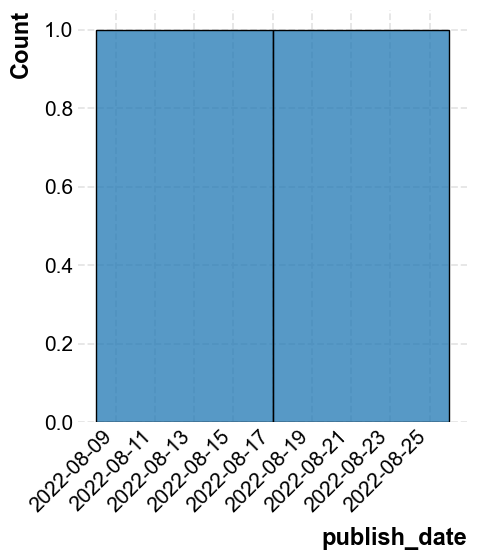

In [2]:
sns.displot(df_doi_first, x="publish_date")
_ = plt.xticks(rotation=45, ha="right")

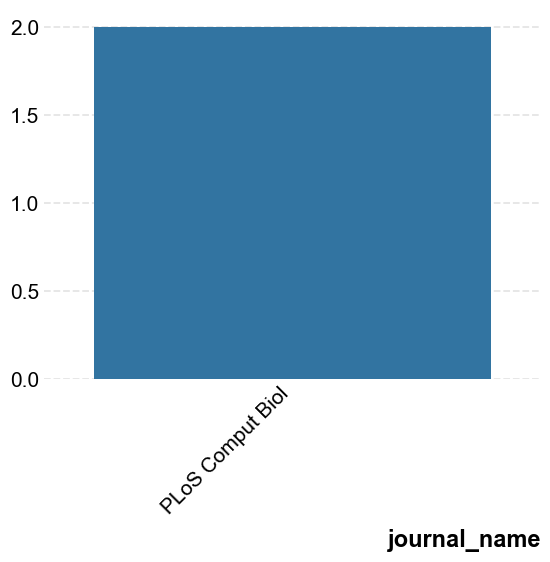

In [3]:
# Get counts of each journal name and sort by count
journal_counts = (
    df_doi_first["journal_name"].value_counts().sort_values(ascending=False)
)
sns.barplot(y=journal_counts.values, x=journal_counts.index, hue=journal_counts.index)
_ = plt.xticks(rotation=45, ha="right")

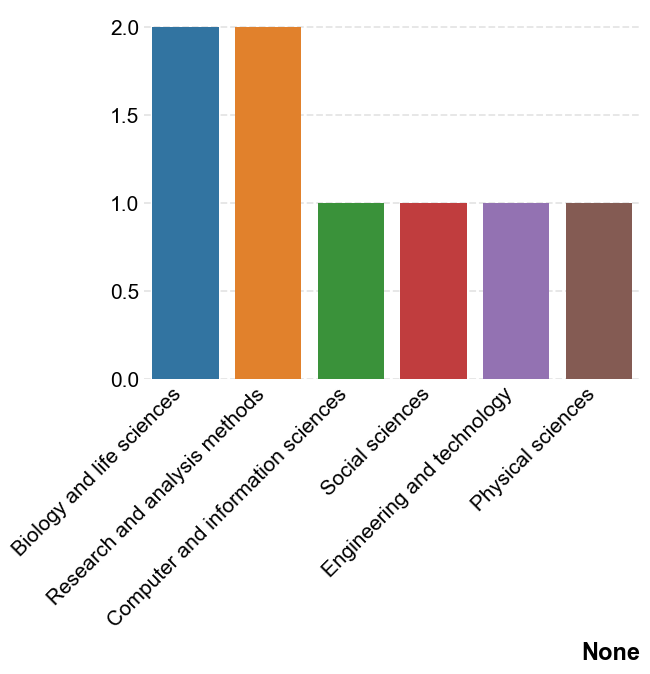

In [4]:
# Process disciplines by splitting by ";"
disc_counts: dict[str, int] = {}
for disc in df_doi_first["disciplines"]:
    if disc is None:
        disc_counts["None"] = disc_counts.get("None", 0) + 1
    else:
        for d in disc.split(";"):
            if d not in disc_counts:
                disc_counts[d] = 0
            disc_counts[d] += 1
discipline_counts = pd.Series(disc_counts).sort_values(ascending=False)


sns.barplot(
    x=discipline_counts.index, y=discipline_counts.values, hue=discipline_counts.index
)
_ = plt.xticks(rotation=45, ha="right")

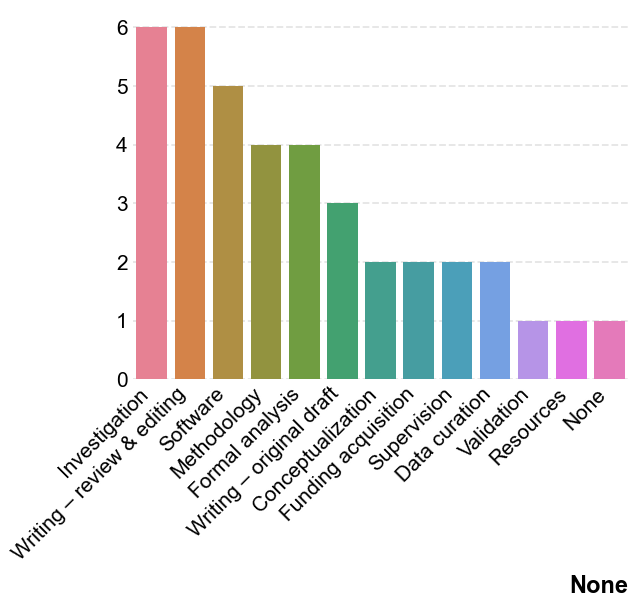

In [5]:
# Process roles by splitting by ";"
role_counts_dict = {}
for roles in df["roles"]:
    if roles is None:
        if "None" not in role_counts_dict:
            role_counts_dict["None"] = 0
        role_counts_dict["None"] += 1
    else:
        for r in roles.split(";"):
            if r not in role_counts_dict:
                role_counts_dict[r] = 0
            role_counts_dict[r] += 1
role_counts = pd.Series(role_counts_dict).sort_values(ascending=False)
sns.barplot(x=role_counts.index, y=role_counts.values, hue=role_counts.index)
_ = plt.xticks(rotation=45, ha="right")

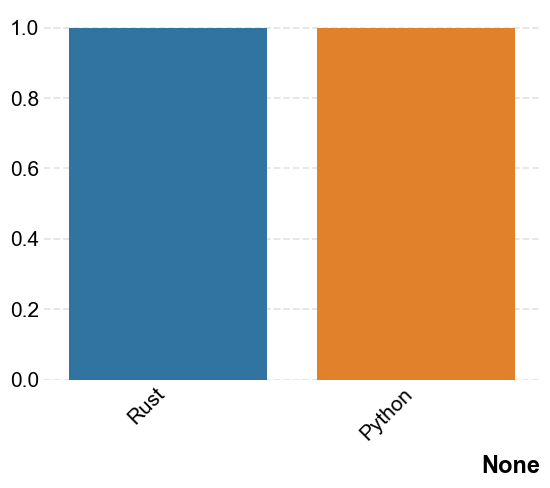

In [6]:
# Process repository_languages by first splitting by ";"
# (to get individual language and code count strings)
# and then by ":" (to get language and code counts)
lang_counts_dict = {}
for langs in df_doi_first["repository_languages"]:
    if langs is None:
        if "None" not in lang_counts_dict:
            lang_counts_dict["None"] = 0
        lang_counts_dict["None"] += 1
    else:
        for lang in langs.split(";"):
            if len(lang) == 0:
                continue
            lang, _ = lang.split(":")
            if lang not in lang_counts_dict:
                lang_counts_dict[lang] = 0
            lang_counts_dict[lang] += 1

lang_counts = pd.Series(lang_counts_dict).sort_values(ascending=False)[:10]
sns.barplot(x=lang_counts.index, y=lang_counts.values, hue=lang_counts.index)
_ = plt.xticks(rotation=45, ha="right")

<Axes: xlabel='author_dev_classification', ylabel='count'>

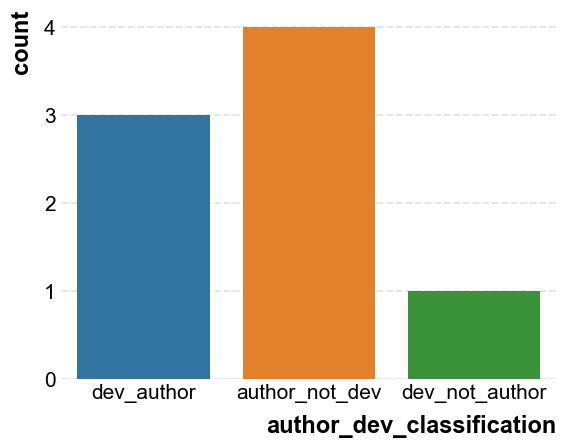

In [7]:
sns.countplot(df, x="author_dev_classification", hue="author_dev_classification")

In [8]:
# For each doi, get the rows from the dataframe
# and then display author info and dev info columns
for doi in np.random.choice(df["doi"].unique(), 2, replace=False):
    group = df[df["doi"] == doi]
    group = group.rename(
        columns={
            "repository_contributor_name": "contrib_name",
            "repository_contributor_username": "contrib_username",
            "author_dev_classification": "contrib_class",
        }
    )
    print(
        group[
            [
                "full_name",
                "contrib_username",
                "contrib_name",
                "contrib_class",
            ]
        ]
    )
    print()
    print()

              full_name contrib_username  contrib_name   contrib_class
0          Niklas Birth          njbirth  Niklas Birth      dev_author
1        Thomas Dencker             None          None  author_not_dev
2  Burkhard Morgenstern             None          None  author_not_dev


            full_name contrib_username contrib_name   contrib_class
3         Vaitea Opuu       vaiteaopuu  Vaitea OPUU      dev_author
4  Nono S. C. Merleau        lemerleau         None      dev_author
5                None            fncnt         None  dev_not_author
6      Vincent Messow             None         None  author_not_dev
7      Matteo Smerlak             None         None  author_not_dev


